## Overview

## Movie Genre Analysis for Microsoft Movie Studio.

This project aims to to provide actionable insights for Microsoft's new movie studio. The goal is to identify commercially successful film types to guide genre selection decisions.

## Business Understanding

Microsoft, has decided to venture into the film industry by establishing a new movie studio. However, lack of experience in movie production necessitates a data-driven approach to navigate this new territory.This project aims to solve the problem of identifying commercially successful movie genres for Microsoft's new studio. Key objectives include:

1.Explore and analyze movie datasets to understand trends and patterns in the film industry.
2.Identify the types of movies that are performing well at the box office according to multiple criteria such as revenue, budget, box office perfomance, ratings, and genre.
3.Translate the findings into concrete business recommendations for Microsoft's new movie studio.


Primary Stakeholder of this project is Microsoft's new movie studio. The project will directly benefit the studio by providing:

1.Actionable recommendations on genres with high domestic gross.
2.Data-driven insights on audience reception verses gross return.
3.A competitive edge by identifying potentially lucrative niche genres.

# Data Understanding

To gain a comprehensive understanding of movie genre performance, we've utilized a combination of data sources;

1.tn.movie_budgets.csv: This table contains essential information about each movie, including its title, genre(s), release date, and production budget. This data allows us to categorize movies by genre and analyze box office performance within those categories.
2.tmdb.movies.csv: This table captures user ratings for various movies. While not a direct measure of box office success, user ratings can offer valuable insights into audience reception and potential genre preferences.
3.bom.movie_gross.csv: This dataset, contains details about a movie's domestic and international box office gross.

## Python Libraliries

In [118]:
# Importing relevant python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

# Read the first CSV file bom.movies into a pandas DataFrame using bom_movies as our variable

In [119]:
#reading the bom.movies using the file path
bom_movies = pd.read_csv(r"C:\Users\user\Desktop\phase1_project\Data\bom.movie_gross.csv")

# Display the first 5 rows
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Display the last 5 rows to check the structure

In [120]:
# Checking the structure of last rows
bom_movies.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


Get the dimensions of a DataFrame

In [121]:
# Check how many rows and columns the dataframe contains.
bom_movies.shape

(3387, 5)

Display information about the DataFrame

In [122]:
# Shows detailed information  of rows,columns,data type and any column with missing values
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Lets use boolean indexing to select the columns with missing values.

In [123]:
#checking columns with missing values
bom_movies.columns[bom_movies.isnull().any()]

Index(['studio', 'domestic_gross', 'foreign_gross'], dtype='object')

From the above output there are 3 columns with missing values. lets check below how many values are missing in each column.

In [124]:
# Get the total missing values in each column
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

From the output we choose to drop all the missing values in the columns studio and domestic gross because the number of missing values is small and not crucial for the analysis.

In [125]:
# Dropping rows with missing values for studio and domestic gross
bom_movies.dropna(subset=['studio', 'domestic_gross'], inplace=True)

#checking the new dimension
bom_movies.shape

(3356, 5)

Foreign gross has a large number of missing values, we will use the forward fill method to fill the NAN values in the dataset because if we delete we will lose alot of data.

In [126]:
# Forward fill missing values in 'foreign_gross' column
bom_movies['foreign_gross'].fillna(method='ffill', inplace=True)

In [127]:
#checking if we still have any column with missing values
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

From the above output we nolonger have missing values. Below we can check data information again to see the changes we have made.

In [128]:
# checking wether the changes we made were effected.
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   object 
 4   year            3356 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


Check for any duplicated values

In [129]:
#checking for any duplicates
duplicates = bom_movies[bom_movies.duplicated()]
duplicates

,title,studio,domestic_gross,foreign_gross,year


Based on the output we do not have any duplicated values.

## Now, lets read the second csv dataset from tmdb.movies below:

In [130]:
# Reading the file
tmdb_movies = pd.read_csv(r"C:\Users\user\Desktop\phase1_project\Data\tmdb.movies.csv", index_col=0)

# Display the first 5 rows
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Lets explore the data by checking any missing values

In [131]:
#Check for the dimension of the dataframe (rows and columns).
tmdb_movies.shape

(26517, 9)

In [132]:
# Shows detailed information  of rows,columns,data type and any column with missing values
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


We can now check if the dataset has any missing values:

In [133]:
#checking if we have any column with missing values
tmdb_movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

since we dont have any missing values as per our output above, we can check if there are any dupplicated values in our dataframe:

In [134]:
#filtering duplicated rows
duplicates = tmdb_movies[tmdb_movies.duplicated()]
duplicates

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553
2536,"[12, 28, 878]",20526,en,TRON: Legacy,13.459,2010-12-10,TRON: Legacy,6.3,4387
2673,"[18, 10749]",46705,en,Blue Valentine,8.994,2010-12-29,Blue Valentine,6.9,1677
2717,"[35, 18, 14, 27, 9648]",45649,en,Rubber,8.319,2010-09-01,Rubber,5.9,417
...,...,...,...,...,...,...,...,...,...
26481,"[35, 18]",270805,en,Summer League,0.600,2013-03-18,Summer League,4.0,3
26485,"[27, 53]",453259,en,Devils in the Darkness,0.600,2013-05-15,Devils in the Darkness,3.5,1
26504,"[27, 35, 27]",534282,en,Head,0.600,2015-03-28,Head,1.0,1
26510,[99],495045,en,Fail State,0.600,2018-10-19,Fail State,0.0,1


The output shows result of 1020 rows duplicated. Below lets drop the duplicated rows

In [135]:
#dropping duplicated rows
tmdb_movies = tmdb_movies.drop_duplicates()

#display the new dimension showing the drpped rows
tmdb_movies.shape

(25497, 9)

## Combining Datasets

In [136]:
#merging the bom_movies and tmdb dataset based on the movie titles
merged_movies = pd.merge(bom_movies, tmdb_movies, left_on='title', right_on='title', how='inner')

#show the merged dataset
merged_movies

,title,studio,domestic_gross,foreign_gross,year,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.0,652000000,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340
1,Inception,WB,292600000.0,535700000,2010,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909
4,Iron Man 2,Par.,312400000.0,311500000,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,The Escape,IFC,14000.0,30000,2018,"[53, 28]",459814,en,The Escape,0.600,2015-08-14,7.0,1
2431,The Escape,IFC,14000.0,30000,2018,"[53, 28]",417004,en,The Escape,1.176,2016-10-23,6.6,10
2432,Souvenir,Strand,11400.0,30000,2018,"[35, 18]",408258,fr,Souvenir,2.130,2016-09-08,5.8,14
2433,The Quake,Magn.,6200.0,30000,2018,[12],416194,no,Skjelvet,11.051,2018-12-14,6.7,81


Which top five movie has the highest domestic gross :

In [137]:
# Finding top five  highest domestic gross
Top_5_domestic_gross = merged_movies.sort_values(by='domestic_gross', ascending=False)

# printing out top five domestic gross rows
Top_5_domestic_gross.head()

,title,studio,domestic_gross,foreign_gross,year,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
1372,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015,"[28, 12, 878, 14]",140607,en,Star Wars: The Force Awakens,32.281,2015-12-18,7.4,12641
2230,Black Panther,BV,700100000.0,646900000,2018,"[28, 16]",86841,en,Black Panther,2.058,2011-01-18,5.1,11
2231,Black Panther,BV,700100000.0,646900000,2018,"[28, 12, 14, 878]",284054,en,Black Panther,44.140,2018-02-16,7.4,12365
2229,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,8.3,13948
1373,Jurassic World,Uni.,652300000.0,"1,019.4",2015,"[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,6.6,14056


## Ploting bar graph

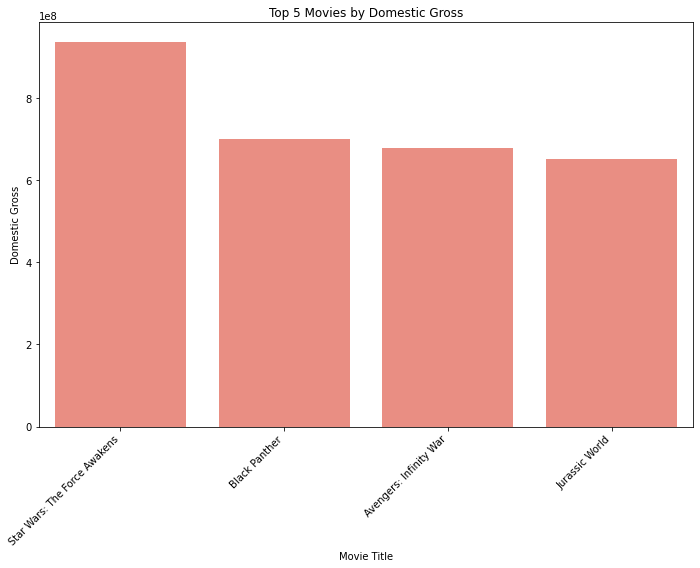

In [138]:
#Sort by domestic gross (descending) and select top 5 rows
Top_5_domestic_gross = merged_movies.sort_values(by='domestic_gross', ascending=False).head(5)

# Create the bar graph with Seaborn
plt.figure(figsize=(10, 8))  
sns.barplot(x='title', y='domestic_gross', data=Top_5_domestic_gross, color='salmon')
plt.title('Top 5 Movies by Domestic Gross')
plt.xlabel('Movie Title')
plt.ylabel('Domestic Gross')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()






From the graph;

1.Star wars: The Force Awakens performed well with the highest return domestically.

Black Panther,Avengers:Infinity War and Jurassic world have a competitive reception in the market because their gross has a small difference.

Black Panther is the second in gross performance

Comparing the relationship between a movie's popularity (based on the "popularity" column) and its domestic gross: